Steps:
1. generate rollouts over example prompts
2. compute and store activations over all tokens all layers
3. test out each of the hypotheses
4. try make a progress bar

# 1. Generate rollouts over prompts

In [1]:
import vllm
model_name = "google/gemma-2-2b-it"

In [2]:
# Load Gemma 2 2B Instruct model with vLLM
model_name = "google/gemma-2-2b-it"
llm = vllm.LLM(
    model=model_name,
    trust_remote_code=True
)


INFO 09-27 16:03:20 [__init__.py:216] Automatically detected platform cuda.
INFO 09-27 16:03:21 [utils.py:328] non-default args: {'trust_remote_code': True, 'disable_log_stats': True, 'model': 'google/gemma-2-2b-it'}


The argument `trust_remote_code` is to be used with Auto classes. It has no effect here and is ignored.


INFO 09-27 16:03:29 [__init__.py:742] Resolved architecture: Gemma2ForCausalLM


`torch_dtype` is deprecated! Use `dtype` instead!


INFO 09-27 16:03:29 [__init__.py:1815] Using max model len 8192
INFO 09-27 16:03:30 [scheduler.py:222] Chunked prefill is enabled with max_num_batched_tokens=8192.
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:32 [core.py:654] Waiting for init message from front-end.
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:32 [core.py:76] Initializing a V1 LLM engine (v0.10.2) with config: model='google/gemma-2-2b-it', speculative_config=None, tokenizer='google/gemma-2-2b-it', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, tokenizer_revision=None, trust_remote_code=True, dtype=torch.bfloat16, max_seq_len=8192, download_dir=None, load_format=auto, tensor_parallel_size=1, pipeline_parallel_size=1, data_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, device_config=cuda, decoding_config=DecodingConfig(backend='auto', disable_fallback=False, disable_any_whitespace=False, disable_additional_properties=False, reasoning_backend=''),

[W927 16:03:34.430437083 ProcessGroupNCCL.cpp:981] Warning: TORCH_NCCL_AVOID_RECORD_STREAMS is the default now, this environment variable is thus deprecated. (function operator())


[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
[Gloo] Rank 0 is connected to 0 peer ranks. Expected number of connected peer ranks is : 0
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:35 [gpu_model_runner.py:2370] Loading model from scratch...
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:35 [cuda.py:362] Using Flash Attention backend on V1 engine.
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:35 [weight_utils.py:348] Using model weights format ['*.safetensors']


Loading safetensors checkpoint shards:   0% Completed | 0/2 [00:00<?, ?it/s]


(EngineCore_DP0 pid=6456) INFO 09-27 16:03:37 [default_loader.py:268] Loading weights took 1.05 seconds
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:37 [gpu_model_runner.py:2392] Model loading took 4.9000 GiB and 1.983910 seconds
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:41 [backends.py:539] Using cache directory: /root/.cache/vllm/torch_compile_cache/f811d6a0c6/rank_0_0/backbone for vLLM's torch.compile
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:41 [backends.py:550] Dynamo bytecode transform time: 3.65 s
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:42 [backends.py:194] Cache the graph for dynamic shape for later use


(EngineCore_DP0 pid=6456) [rank0]:W0927 16:03:50.709000 6456 torch/_inductor/utils.py:1436] [0/0] Not enough SMs to use max_autotune_gemm mode


(EngineCore_DP0 pid=6456) INFO 09-27 16:03:51 [backends.py:215] Compiling a graph for dynamic shape takes 8.87 s
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:52 [monitor.py:34] torch.compile takes 12.52 s in total
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:53 [gpu_worker.py:298] Available KV cache memory: 12.57 GiB
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:54 [kv_cache_utils.py:1028] GPU KV cache size: 126,736 tokens
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:54 [kv_cache_utils.py:1032] Maximum concurrency for 8,192 tokens per request: 15.46x


Capturing CUDA graphs (mixed prefill-decode, PIECEWISE): 100%|██████████| 67/67 [00:02<00:00, 23.61it/s]


(EngineCore_DP0 pid=6456) INFO 09-27 16:03:58 [gpu_model_runner.py:3118] Graph capturing finished in 4 secs, took 0.43 GiB
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:58 [gpu_worker.py:391] Free memory on device (21.84/22.06 GiB) on startup. Desired GPU memory utilization is (0.9, 19.85 GiB). Actual usage is 4.9 GiB for weight, 2.37 GiB for peak activation, 0.02 GiB for non-torch memory, and 0.43 GiB for CUDAGraph memory. Replace gpu_memory_utilization config with `--kv-cache-memory=12877243289` to fit into requested memory, or `--kv-cache-memory=15012923904` to fully utilize gpu memory. Current kv cache memory in use is 13498000281 bytes.
(EngineCore_DP0 pid=6456) INFO 09-27 16:03:58 [core.py:218] init engine (profile, create kv cache, warmup model) took 20.62 seconds
INFO 09-27 16:04:00 [llm.py:295] Supported_tasks: ['generate']
INFO 09-27 16:04:00 [__init__.py:36] No IOProcessor plugins requested by the model


In [3]:
import json

# Load instructions from splits/harmless_train.json
with open('splits/harmless_train.json', 'r') as f:
    data = json.load(f)

# Get the tokenizer to apply chat template
tokenizer = llm.get_tokenizer()

# Apply chat template to each instruction
instructions = []
for item in data:
    # Format as a chat message
    messages = [{"role": "user", "content": item['instruction']}]
    # Apply the chat template
    formatted_instruction = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)
    instructions.append(formatted_instruction)

print(f"Loaded {len(instructions)} instructions with chat template applied")


Loaded 18794 instructions with chat template applied


In [4]:
# Run vLLM in parallel over all instructions
outputs = llm.generate(instructions[:1000], sampling_params=vllm.SamplingParams(max_tokens=8192))

Adding requests:   0%|          | 0/1000 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1000 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s…

In [5]:
responses = [{'instruction': y, 'response': x.outputs[0].text, 'char_length': len(x.outputs[0].text), 'tokens_length': len(x.outputs[0].token_ids)} for x,y in zip(outputs, instructions)]

In [6]:
# Save responses to JSON file
import json
import os

# Create directory if it doesn't exist
os.makedirs('/workspace/llm-progress-monitor/rollouts', exist_ok=True)

# Save to JSON file
with open(f'/workspace/llm-progress-monitor/rollouts/{model_name.split("/")[-1]}.json', 'w') as f:
    json.dump(responses, f, indent=2)

print(f"Saved {len(responses)} responses to /workspace/llm-progress-monitor/rollouts/{model_name.split('/')[-1]}.json")

Saved 1000 responses to /workspace/llm-progress-monitor/rollouts/gemma-2-2b-it.json


# 2. Compute and store activations over all tokens all layers

In [7]:
import nnsight
import torch
import json
from transformers import AutoTokenizer
model_name = "google/gemma-2-2b-it"

In [8]:
with open(f'/workspace/llm-progress-monitor/rollouts/{model_name.split("/")[-1]}.json', 'r') as f:
    responses = json.load(f)

In [9]:
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [10]:
# Format each response with Gemma 2 chat template
formatted_responses = []
for response in responses:
    # Apply Gemma 2 chat template format
    chat_formatted = tokenizer.apply_chat_template(
        [
            {"role": "user", "content": response['instruction']},
            {"role": "assistant", "content": response['response']}
        ],
        tokenize=False,
        add_generation_prompt=False
    )
    
    formatted_item = {
        'instruction': response['instruction'],
        'response': response['response'],
        'chat_formatted': chat_formatted,
        'char_length': response['char_length'],
        'tokens_length': response['tokens_length']
    }
    formatted_responses.append(formatted_item)

formatted_responses

[{'instruction': '<bos><start_of_turn>user\nWrite a short story about a cat and a dog.<end_of_turn>\n<start_of_turn>model\n',
  'response': 'Bartholomew the tabby was a creature of scent and habit. He adored the feel of sun drenched floorsboards and the weight of his owner\'s hand on his head, and above all, the comforting routine that held him steady. But lately, a new scent had infiltrated his predictable haven – the sweet, clumsy gravity of the two-legged behemoth they called Max.\n\nMax, a boisterous Labrador with boundless energy that swallowed Bartholomew\'s peaceful swats of swatted feathers, had recently moved into the house with his family. His boisterous spirit was as much a snarl in Bartholomew\'s accustomed composure as a whirlwind hitting a calm sea. \n\nTheir initial interactions were less than complimentary. Shadows flew across Bartholomew\'s usually placid fur when Max weaved near, the tail ruffle in growl that set off a slow cascade of feline friendship deterrents. \n\

In [5]:
import os
import gc
# Create activations directory if it doesn't exist
activations_dir = '/workspace/llm-progress-monitor/rollouts/activations'
os.makedirs(activations_dir, exist_ok=True)

model = nnsight.LanguageModel(model_name, device_map="auto")

In [14]:

for i, formatted_response in enumerate(formatted_responses[172:1000]):
    gc.collect()
    torch.cuda.empty_cache()
    chat_formatted = formatted_response['chat_formatted']
    input_ids_len = len(tokenizer.encode(tokenizer.apply_chat_template([{"role": "user", "content": formatted_response['instruction']}], tokenize=False, add_generation_prompt=True), return_tensors='pt')[0])
    
    # Tokenize the chat
    try:
        with model.trace(chat_formatted):
            gc.collect()
            torch.cuda.empty_cache()
            layer_outputs = []
            for layer in model.model.layers:
                layer_outputs.append(layer.output[0][:,input_ids_len:])
            activations = torch.cat(layer_outputs, dim=0)
            torch.save(activations, f'{activations_dir}/{i+172}.pt')
            print(f"Saved activations for response {i+172}")
    except Exception as e:
        print(f"Error on response {i+172}: {e}")
        gc.collect()
        torch.cuda.empty_cache()

Saved activations for response 172
Saved activations for response 173
Saved activations for response 174
Saved activations for response 175
Saved activations for response 176
Saved activations for response 177
Saved activations for response 178
Error on response 178: 

Traceback (most recent call last):
  File "/workspace/llm-progress-monitor/venv/lib/python3.11/site-packages/nnsight/intervention/backends/execution.py", line 21, in __call__
    tracer.execute(fn)
  File "/workspace/llm-progress-monitor/venv/lib/python3.11/site-packages/nnsight/intervention/tracing/tracer.py", line 385, in execute
    self.model.interleave(self.fn, *args, **kwargs)
  File "/workspace/llm-progress-monitor/venv/lib/python3.11/site-packages/nnsight/modeling/mixins/meta.py", line 76, in interleave
    return super().interleave(fn, *args, **kwargs)
  File "/workspace/llm-progress-monitor/venv/lib/python3.11/site-packages/nnsight/intervention/envoy.py", line 733, in interleave
    fn(*args, **kwargs)
  File "

# 3. Test out each hypothesis

- Linear n_tokens_remaining
- Logarithmic n_tokens_remaining
- Linear % of response left
- Linear n_total_tokens
- Rotation around a circle to track n_tokens_remaining modulo something?


In [1]:
from torch.utils.data import DataLoader, Dataset
from typing import List
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import gc

In [2]:
import os
activations_dir = '/workspace/llm-progress-monitor/rollouts/activations'
layer_idx = 4
activations = []
with torch.no_grad():
    for i in range(len(os.listdir(activations_dir))):
        if i % 10 == 0:
            print(f"Loaded {i} activations")
            gc.collect()
            torch.cuda.empty_cache()
        filename = f'{i}.pt'
        if os.path.exists(os.path.join(activations_dir, filename)):
            activations.append(torch.load(os.path.join(activations_dir, filename))[layer_idx].to('cpu'))
# Train-test split on activations
from sklearn.model_selection import train_test_split

train_activations, test_activations = train_test_split(activations, test_size=0.2, random_state=42)
print(f"Train set size: {len(train_activations)}")
print(f"Test set size: {len(test_activations)}")

Loaded 0 activations
Loaded 10 activations
Loaded 20 activations
Loaded 30 activations
Loaded 40 activations
Loaded 50 activations
Loaded 60 activations
Loaded 70 activations
Loaded 80 activations
Loaded 90 activations
Loaded 100 activations
Loaded 110 activations
Loaded 120 activations
Loaded 130 activations
Loaded 140 activations
Loaded 150 activations
Loaded 160 activations
Loaded 170 activations
Loaded 180 activations
Loaded 190 activations
Loaded 200 activations
Loaded 210 activations
Loaded 220 activations
Loaded 230 activations
Loaded 240 activations
Loaded 250 activations
Loaded 260 activations
Loaded 270 activations
Loaded 280 activations
Loaded 290 activations
Loaded 300 activations
Loaded 310 activations
Loaded 320 activations
Loaded 330 activations
Loaded 340 activations
Loaded 350 activations
Loaded 360 activations
Loaded 370 activations
Loaded 380 activations
Loaded 390 activations
Loaded 400 activations
Loaded 410 activations
Loaded 420 activations
Loaded 430 activations

In [4]:
class TokensRemainingDataset(Dataset):
    def __init__(self, activations: List[torch.Tensor]):
        self.data = []
        for activation in activations:
            for i in range(activation.shape[0]):
                self.data.append((activation[i, :], activation.shape[0] - i, activation.shape[0]))

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]

train_dataset = TokensRemainingDataset(train_activations)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TokensRemainingDataset(test_activations)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)


## 3.1 Linear n_tokens_remaining

In [119]:
class LinearRegression(nn.Module):
    def __init__(self,input_dim: int):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)
model = LinearRegression(train_dataset[0][0].shape[0]).to('cuda')

In [39]:
adam = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

In [ ]:
losses = []
for X, y, _ in tqdm(train_dataloader):
    adam.zero_grad()
    pred = model(X.to('cuda', dtype=torch.float32))
    loss = loss_fn(pred, y.to('cuda', dtype=torch.float32))
    loss.backward()
    adam.step()
    losses.append(loss.item())

100%|█████████▉| 421/422 [00:55<00:00,  7.76it/s]/workspace/llm-progress-monitor/venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([42])) that is different to the input size (torch.Size([42, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 422/422 [00:55<00:00,  7.57it/s]


In [ ]:
import matplotlib.pyplot as plt

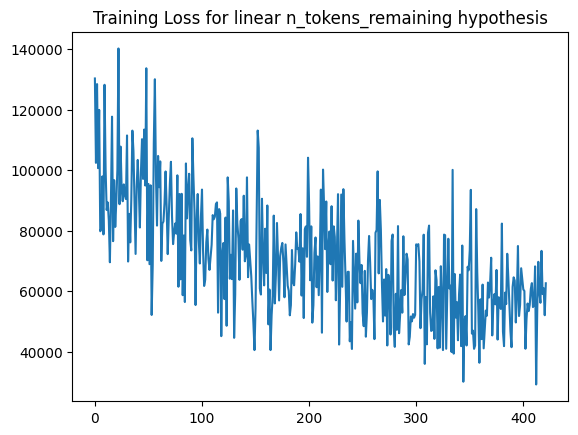

In [32]:
plt.title('Training Loss for linear n_tokens_remaining hypothesis')
plt.plot(losses)

In [62]:
# Evaluate test loss
test_losses = []
preds = []
actuals = []
model.eval()
with torch.no_grad():
    for X, y, total_tokens in test_dataloader:
        total_tokens = total_tokens.to('cuda', dtype=torch.float32)
        y = y.to('cuda', dtype=torch.float32)
        pred = model(X.to('cuda', dtype=torch.float32))
        tokens_already_seen = total_tokens - y
        percentage_pred = torch.clamp(pred/(pred + tokens_already_seen), 0.0, 1.0)
        actual_percentage = y/total_tokens
        loss = loss_fn(percentage_pred, actual_percentage)
        test_losses.append(loss.item())
        preds += percentage_pred[0].tolist()
        actuals += actual_percentage.tolist()
average_test_loss = sum(test_losses) / len(test_losses)
print(f"Average test loss: {average_test_loss:.4f}")


Average test loss: 0.3203


/workspace/llm-progress-monitor/venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 64])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/workspace/llm-progress-monitor/venv/lib/python3.11/site-packages/torch/nn/modules/loss.py:616: UserWarning: Using a target size (torch.Size([41])) that is different to the input size (torch.Size([41, 41])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


In [63]:
for X, y, _ in test_dataloader:
    print(y)
    break

tensor([293, 117, 341, 178,  30, 129,  41, 265, 215, 472, 238, 197, 451,  35,
        356,   2,   9,  29, 190, 240, 286, 533, 247,  75,  39,  87,  61, 405,
        236, 186, 204,  28, 123, 476, 357, 578,  75, 316, 156, 167, 168,  23,
         52,  20, 272,  43, 293, 426,  52,  17,  79, 179, 290, 147,  14, 109,
        457, 107, 296, 299, 279,  48, 123, 343])


In [64]:
preds

[0.003416143823415041,
 0.028716236352920532,
 0.005878289230167866,
 0.19128000736236572,
 0.007822391577064991,
 0.006618493236601353,
 0.12427666038274765,
 0.010252423584461212,
 0.0038415214512497187,
 0.002935613039880991,
 0.008476519957184792,
 0.0062128398567438126,
 0.006587769370526075,
 0.019870467483997345,
 0.00879159476608038,
 0.0028358858544379473,
 0.006874999962747097,
 0.002449231455102563,
 0.006409254390746355,
 0.004374376963824034,
 0.011592400260269642,
 0.0031092725694179535,
 0.011592400260269642,
 0.03792529180645943,
 0.00879159476608038,
 0.004205842036753893,
 0.5866284966468811,
 0.011983972042798996,
 0.01471836119890213,
 0.0027112718671560287,
 1.0,
 0.41505613923072815,
 0.012512276880443096,
 0.011687874794006348,
 0.008737465366721153,
 0.060597099363803864,
 0.015523354522883892,
 0.006809027399867773,
 0.007337079383432865,
 0.0864315778017044,
 0.012623577378690243,
 0.016233649104833603,
 0.005667025223374367,
 0.0090726213529706,
 0.0305721256

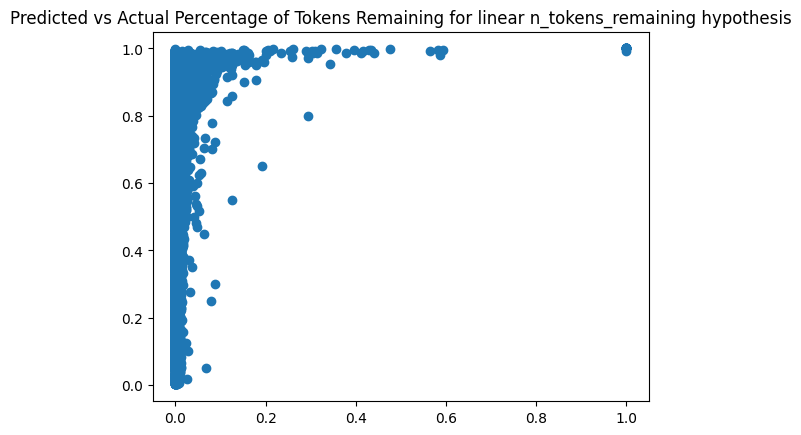

In [67]:
plt.title('Predicted vs Actual Percentage of Tokens Remaining for linear n_tokens_remaining hypothesis')
plt.scatter(preds, actuals)

## 3.2 Logarithmic n_tokens remaining

In [5]:
import matplotlib.pyplot as plt

In [6]:
class NonLinearRegression(nn.Module):
    def __init__(self,input_dim: int):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)
model = NonLinearRegression(train_dataset[0][0].shape[0]).to('cuda')

In [7]:
adam = optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

In [8]:
def evaluate_model(model, test_dataloader, loss_fn):
    preds = []
    actuals = []
    model.eval()
    with torch.no_grad():
        for X, y, total_tokens in test_dataloader:
            total_tokens = total_tokens.to('cuda', dtype=torch.float32)
            y = y.to('cuda', dtype=torch.float32)
            pred = model(X.to('cuda', dtype=torch.float32)).exp()
            preds += pred.flatten().tolist()
            actuals += (y+1).log().flatten().tolist()
    return preds, actuals

  0%|          | 0/422 [00:00<?, ?it/s]

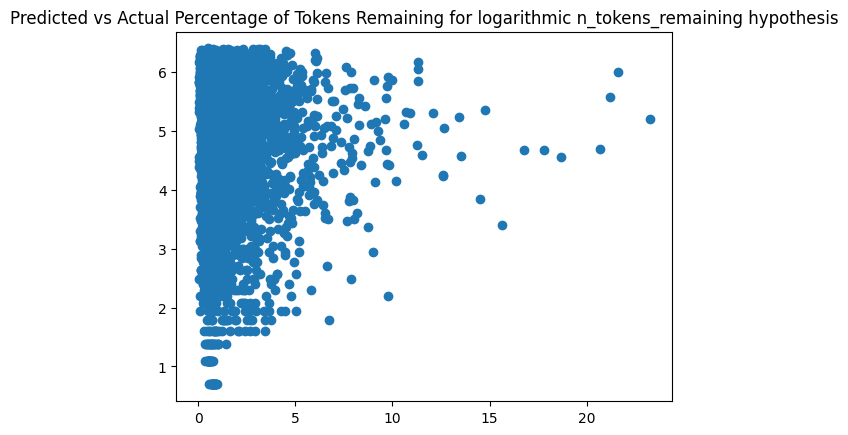

 12%|█▏        | 50/422 [00:06<00:49,  7.56it/s]

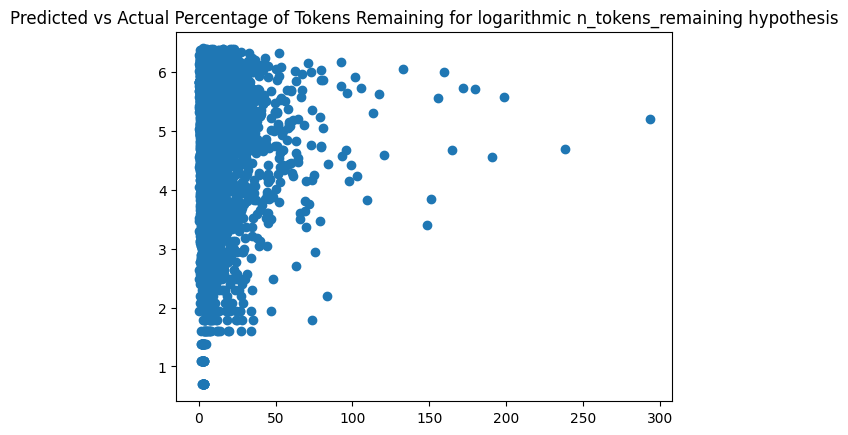

 24%|██▎       | 100/422 [00:13<00:43,  7.47it/s]

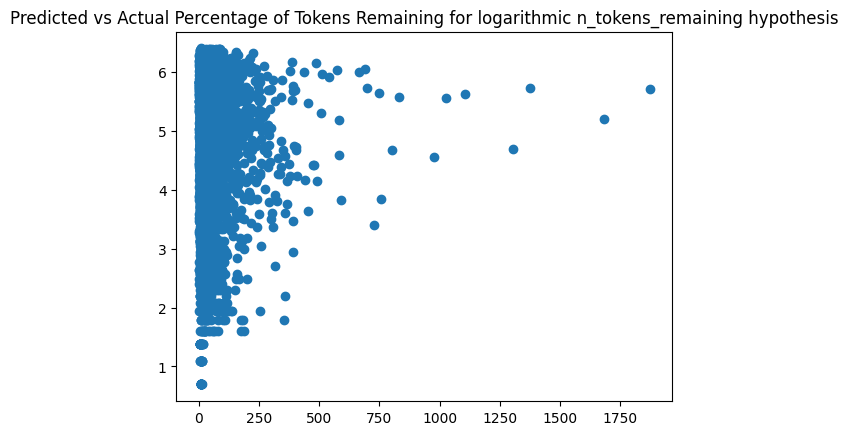

 28%|██▊       | 118/422 [00:16<00:41,  7.33it/s]


KeyboardInterrupt: 

In [160]:
losses = []

for i,(X, y, total_tokens) in enumerate(tqdm(train_dataloader)):
    y = y.to('cuda', dtype=torch.float32)
    total_tokens = total_tokens.to('cuda', dtype=torch.float32)
    adam.zero_grad()
    pred = model(X.to('cuda', dtype=torch.float32))
    loss = loss_fn(pred, (y+1).log())
    loss.backward()
    adam.step()
    losses.append(loss.item())
    if i % 50 == 0:
        preds, actuals = evaluate_model(model, test_dataloader, loss_fn)
        plt.title('Predicted vs Actual Percentage of Tokens Remaining for logarithmic n_tokens_remaining hypothesis')
        plt.scatter(preds, actuals)
        plt.show()

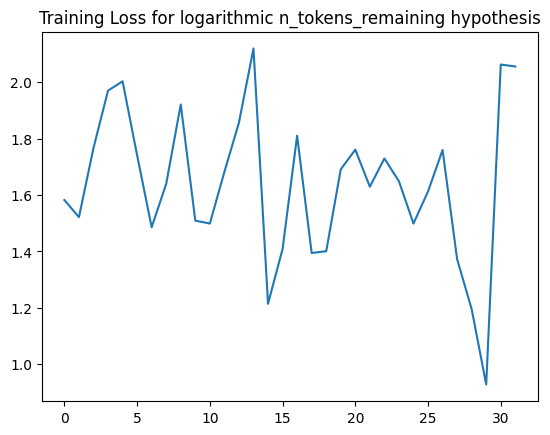

In [148]:
plt.title('Training Loss for logarithmic n_tokens_remaining hypothesis')
plt.plot(losses)

In [149]:
losses

[1.5821728706359863,
 1.5215047597885132,
 1.7669475078582764,
 1.9704666137695312,
 2.0035452842712402,
 1.7410311698913574,
 1.4857456684112549,
 1.639748454093933,
 1.9211320877075195,
 1.5091004371643066,
 1.4987671375274658,
 1.6820403337478638,
 1.8569215536117554,
 2.120006561279297,
 1.2142025232315063,
 1.4085485935211182,
 1.8105453252792358,
 1.3943766355514526,
 1.4006779193878174,
 1.6910302639007568,
 1.7610925436019897,
 1.6294690370559692,
 1.7297940254211426,
 1.6487996578216553,
 1.4988222122192383,
 1.6126222610473633,
 1.759974479675293,
 1.3724327087402344,
 1.1951273679733276,
 0.9277853965759277,
 2.0630064010620117,
 2.0561015605926514]

In [150]:
preds, actuals = evaluate_model(model, train_dataloader, loss_fn)

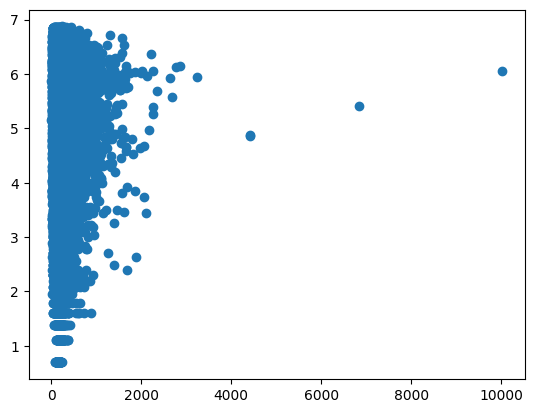

In [151]:
plt.scatter(preds, torch.tensor(actuals))

In [164]:
for X,y, _ in train_dataloader:
    print(X.shape, y.shape)
    break

torch.Size([64, 2304]) torch.Size([64])


In [165]:
X

tensor([[-0.4393, -0.1185, -0.7637,  ..., -0.5523, -1.9968,  0.2930],
        [ 0.2284,  0.5505, -0.8176,  ...,  1.2768,  0.7874,  1.2934],
        [-0.5795,  0.2582,  0.0205,  ...,  0.8674, -0.2082, -1.3224],
        ...,
        [-0.5795,  0.1492,  0.2156,  ...,  1.4860, -0.0095, -1.0554],
        [-0.8186, -1.4592,  0.3324,  ...,  0.1479,  1.2593,  1.7201],
        [-2.6006, -0.2781,  1.8678,  ...,  0.6426, -1.5274,  1.6127]],
       device='cuda:0', grad_fn=<StackBackward0>)

## 3.5 rotation 

In [ ]:
n_bins = 8
class LogBinClassifier(nn.Module):
    def __init__(self,input_dim: int):
        super().__init__()
        self.linear = nn.Linear(input_dim, n_bins)

    def forward(self, x):
        return self.linear(x)
    
model = LogBinClassifier(train_dataset[0][0].shape[0]).to('cuda')
adam = optim.Adam(model.parameters(), lr=0.0001)
# Calculate class frequencies from training data
class_counts = torch.zeros(n_bins)
total_samples = 0

for X, y, _ in train_dataloader:
    y_binned = bin_y(y)
    for i in range(n_bins):
        class_counts[i] += (y_binned == i).sum().item()
    total_samples += len(y)

# Calculate inverse frequency weights
weight = total_samples / (n_bins * class_counts)
weight = weight.to('cuda', dtype=torch.float32)
print("Class frequencies:", class_counts)
print("Weights:", weight)
losses = []

Class frequencies: tensor([   796.,   3979.,  10149.,  25022.,  63207., 127968.,  96786.,   1083.])
Weights: tensor([51.6630, 10.3352,  4.0520,  1.6435,  0.6506,  0.3214,  0.4249, 37.9721],
       device='cuda:0')


In [60]:
def bin_y(y):
    return (y+1).log().floor().clamp(0,n_bins-1).to('cuda', dtype=torch.long)

In [61]:
loss_fn = nn.CrossEntropyLoss(weight = weight)

In [ ]:
test_losses = []

for i, (X, y, _) in enumerate(train_dataloader):
    model.zero_grad()
    preds = model(X.to('cuda'))
    y_transformed = bin_y(y)
    loss = loss_fn(preds, y_transformed)
    loss.backward()
    adam.step()
    losses.append(loss.item())
    
    # Calculate test loss
    if i % 10 == 0:  # Calculate test loss every 10 batches
        model.eval()
        test_loss_sum = 0
        test_batches = 0
        with torch.no_grad():
            for X_test, y_test, _ in test_dataloader:
                preds_test = model(X_test.to('cuda'))
                y_test_transformed = bin_y(y_test)
                test_loss = loss_fn(preds_test, y_test_transformed)
                test_loss_sum += test_loss.item()
                test_batches += 1
        test_losses.append(test_loss_sum / test_batches)
        model.train()
    
    print(f"Batch {i}, Train Loss: {loss.item():.4f}")
    if i % 10 == 0 and test_losses:
        print(f"Test Loss: {test_losses[-1]:.4f}")

Batch 0, Train Loss: 2.2534
Test Loss: 2.4904
Batch 1, Train Loss: 2.4273
Batch 2, Train Loss: 2.2223
Batch 3, Train Loss: 2.5964
Batch 4, Train Loss: 2.4758
Batch 5, Train Loss: 2.4975
Batch 6, Train Loss: 2.2990
Batch 7, Train Loss: 2.2449
Batch 8, Train Loss: 2.1410
Batch 9, Train Loss: 2.2506
Batch 10, Train Loss: 2.0080
Test Loss: 2.3927
Batch 11, Train Loss: 2.3339
Batch 12, Train Loss: 2.4045
Batch 13, Train Loss: 2.4144
Batch 14, Train Loss: 2.5442
Batch 15, Train Loss: 2.1352
Batch 16, Train Loss: 2.3420
Batch 17, Train Loss: 2.9446
Batch 18, Train Loss: 2.3474
Batch 19, Train Loss: 2.1094
Batch 20, Train Loss: 2.4515
Test Loss: 2.3147
Batch 21, Train Loss: 1.5872
Batch 22, Train Loss: 2.1624
Batch 23, Train Loss: 2.3909
Batch 24, Train Loss: 2.3510
Batch 25, Train Loss: 1.8236
Batch 26, Train Loss: 2.4334
Batch 27, Train Loss: 1.7294
Batch 28, Train Loss: 2.7638
Batch 29, Train Loss: 2.2359
Batch 30, Train Loss: 2.0957
Test Loss: 2.2380
Batch 31, Train Loss: 2.0688
Batch 32, 

In [ ]:
import matplotlib.pyplot as plt

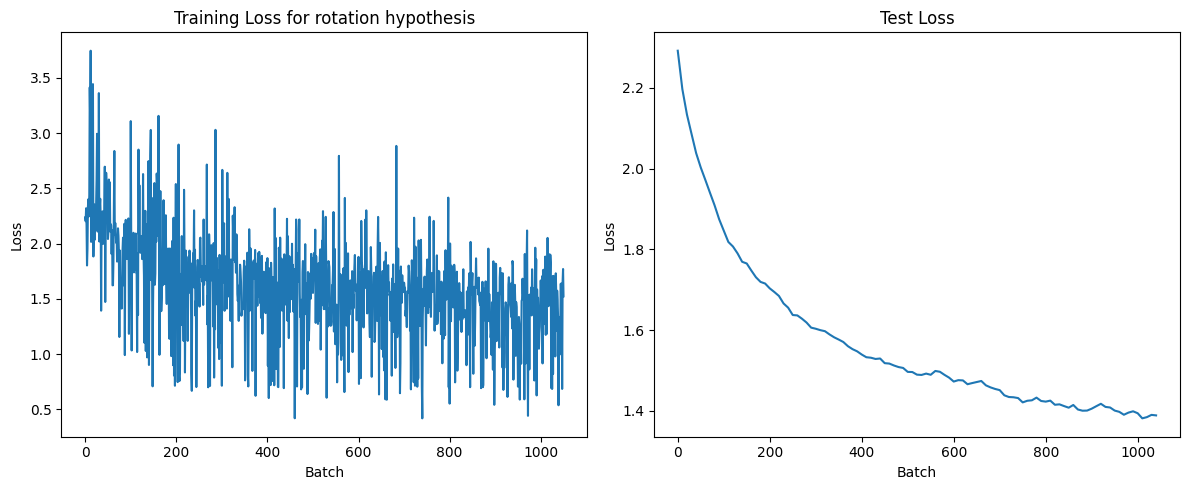

tensor([6, 6, 6, 4, 4, 6, 5, 4, 5, 4, 6, 6, 6, 4, 4, 5, 4, 5, 6, 5, 5, 6, 6, 6,
        4, 5, 4, 3, 6, 6, 4, 4, 6, 5, 4, 4, 5, 6, 3, 5, 3, 5, 6, 6, 6, 3, 6, 3,
        5, 5, 6, 5, 6, 5, 4, 6, 6, 5, 5, 4, 5, 3, 3, 6], device='cuda:0')

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Training Loss for rotation hypothesis')
plt.plot(losses)
plt.xlabel('Batch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.title('Test Loss')
# Fix the x-axis to match the length of test_losses
test_x_values = [i for i in range(0, len(losses), 10) if i // 10 < len(test_losses)]
plt.plot(test_x_values, test_losses[:len(test_x_values)])
plt.xlabel('Batch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

model.zero_grad()
preds = model(X.to('cuda'))
preds.argmax(dim=1)
y_transformed


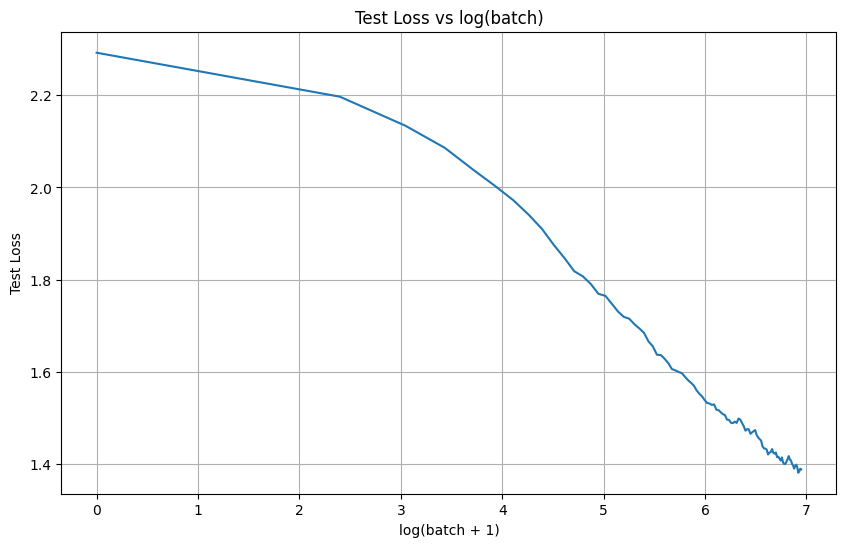

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create x-axis values for batches where test losses were recorded
test_batch_indices = [i for i in range(0, len(losses), 10) if i // 10 < len(test_losses)]

plt.figure(figsize=(10, 6))
plt.plot(np.log(np.array(test_batch_indices) + 1), test_losses[:len(test_batch_indices)])
plt.xlabel('log(batch + 1)')
plt.ylabel('Test Loss')
plt.title('Test Loss vs log(batch)')
plt.grid(True)
plt.show()

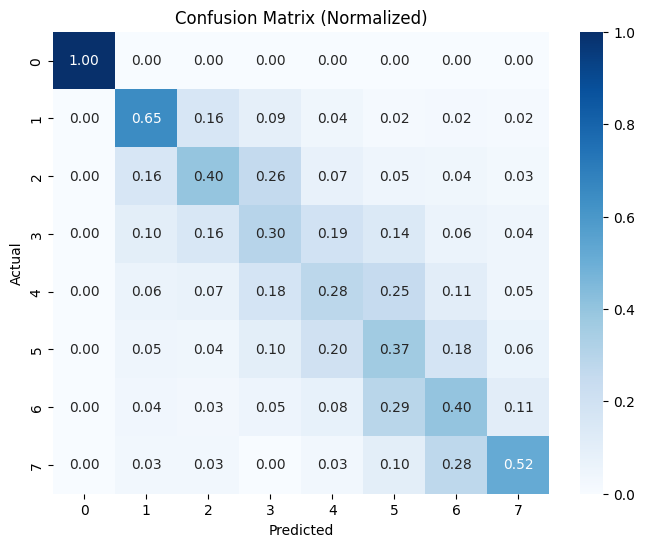

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

all_preds = []
all_targets = []

for X, y, _ in test_dataloader:
    with torch.no_grad():
        preds = model(X.to('cuda'))
        y_transformed = bin_y(y)
        all_preds.extend(preds.argmax(dim=1).cpu().numpy())
        all_targets.extend(y_transformed.cpu().numpy())

cm = confusion_matrix(all_targets, all_preds)
# Normalize each row so it sums to 1
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title('Confusion Matrix (Normalized)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
model.linear.weight.norm(dim=1)

tensor([0.8980, 0.7355, 0.6742, 0.5652, 0.5636, 0.8017, 1.2350, 0.9571],
       device='cuda:0', grad_fn=<LinalgVectorNormBackward0>)

In [21]:
model.linear.bias

Parameter containing:
tensor([-0.0118,  0.0002, -0.0013,  0.0207, -0.0014, -0.0011,  0.0156, -0.0185],
       device='cuda:0', requires_grad=True)

In [30]:
mean_vecs = torch.zeros(n_bins, train_dataset[0][0].shape[0]).to('cuda')
counts = torch.zeros(n_bins).to('cuda')
for X,y, _ in train_dataloader:
    print(X.shape, y.shape)
    y_transformed = bin_y(y)
    print(y_transformed)
    mean_vecs[y_transformed] += X.to('cuda')
    counts[y_transformed] += 1

mean_vecs = mean_vecs / counts.unsqueeze(1)

torch.Size([64, 2304]) torch.Size([64])
tensor([5, 5, 5, 4, 4, 4, 6, 6, 5, 4, 6, 6, 4, 5, 5, 3, 6, 5, 5, 4, 6, 6, 3, 5,
        4, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 5, 4, 5, 3, 4, 5, 6, 4, 5, 6, 6, 5,
        6, 2, 5, 3, 5, 6, 4, 7, 6, 5, 6, 4, 6, 4, 5, 2], device='cuda:0')
torch.Size([64, 2304]) torch.Size([64])
tensor([5, 5, 5, 6, 4, 4, 6, 6, 2, 5, 6, 4, 5, 5, 6, 4, 3, 5, 5, 3, 4, 3, 4, 6,
        6, 6, 6, 5, 4, 6, 3, 6, 5, 5, 3, 6, 6, 5, 6, 6, 5, 5, 5, 4, 6, 5, 5, 3,
        5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 4, 1, 6, 5, 5], device='cuda:0')
torch.Size([64, 2304]) torch.Size([64])
tensor([4, 6, 6, 5, 1, 6, 6, 4, 6, 5, 6, 4, 0, 6, 5, 5, 6, 5, 6, 4, 4, 6, 4, 6,
        5, 6, 6, 6, 5, 6, 6, 4, 5, 3, 6, 5, 6, 6, 6, 4, 4, 5, 5, 3, 6, 6, 6, 3,
        5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 4, 5, 6, 6, 4], device='cuda:0')
torch.Size([64, 2304]) torch.Size([64])
tensor([6, 5, 2, 2, 3, 6, 6, 6, 4, 4, 6, 3, 5, 2, 4, 3, 6, 5, 4, 6, 3, 1, 6, 6,
        5, 4, 4, 5, 6, 5, 6, 6, 5, 3, 5, 2, 6, 6, 3, 5, 5,

### Misc plots

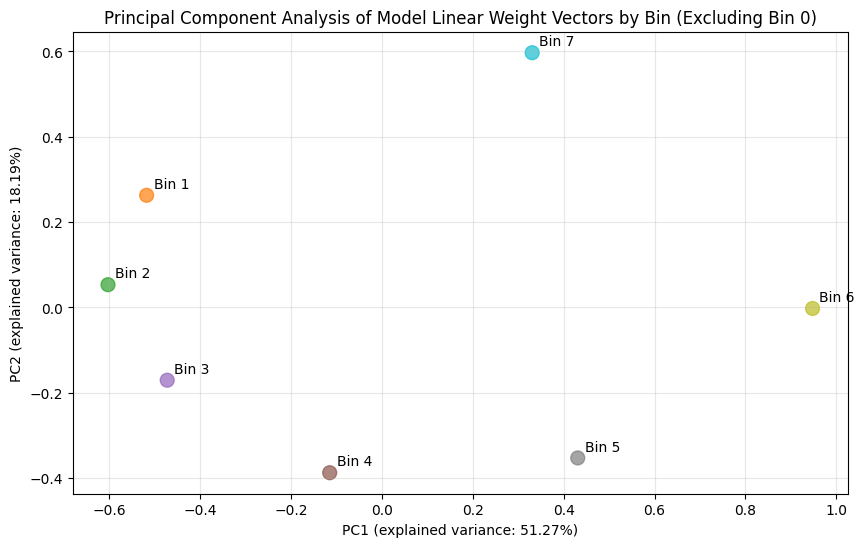

<Figure size 1200x800 with 0 Axes>

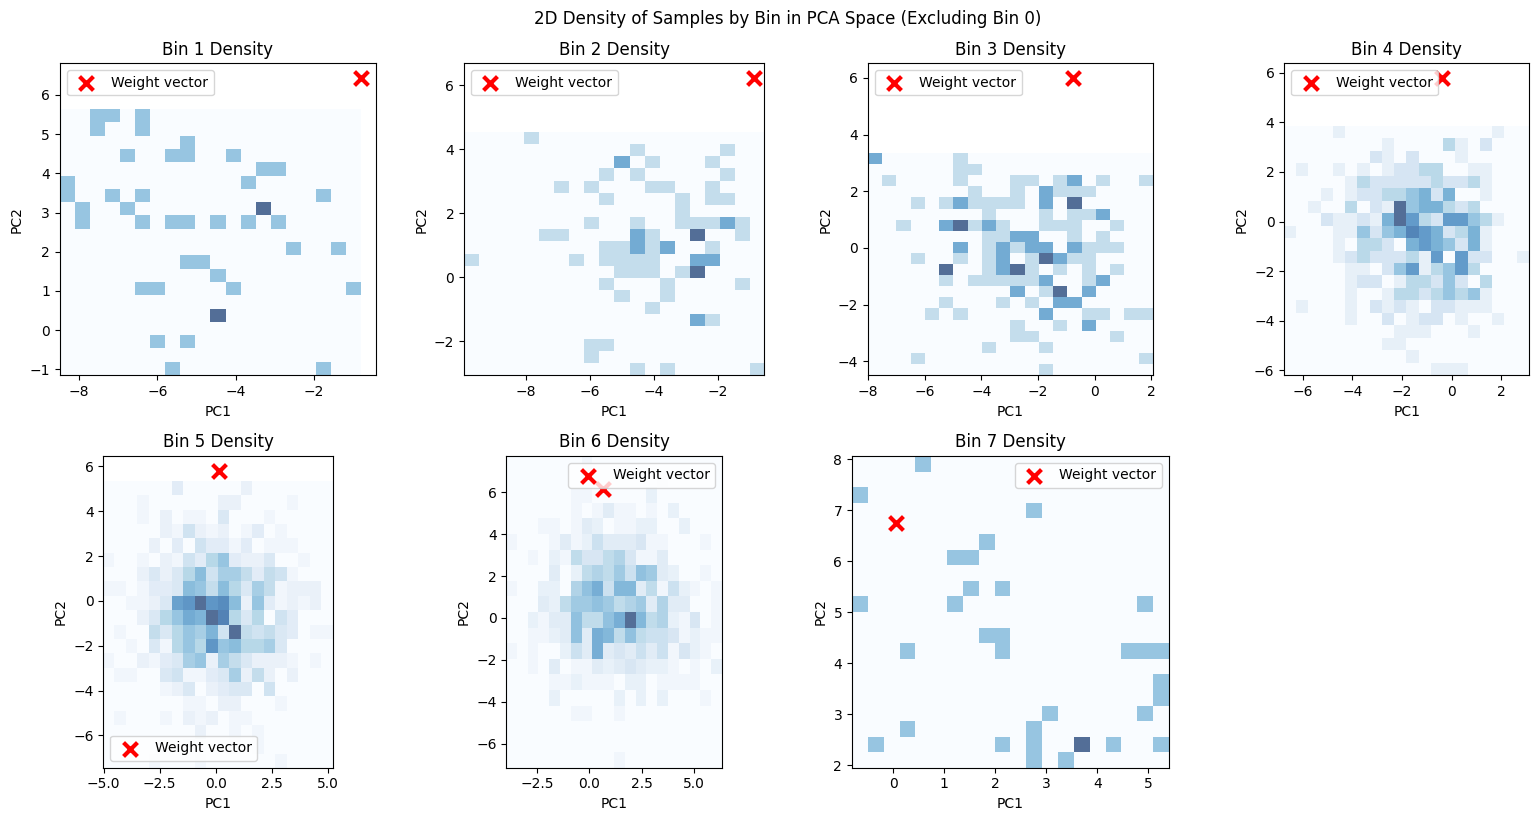

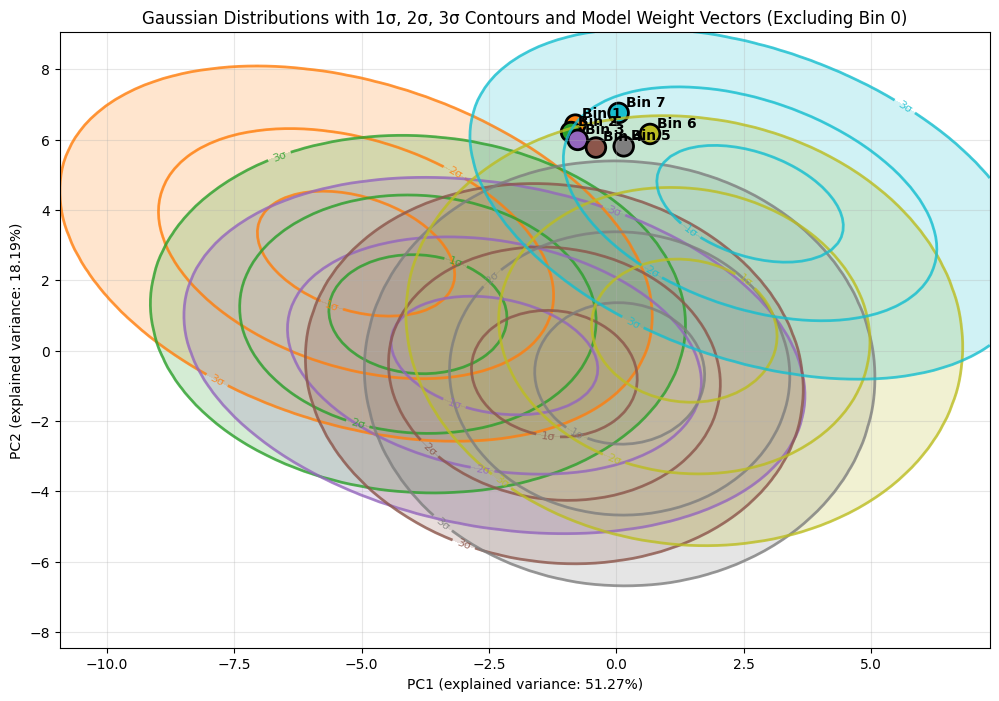

Principal Component Vectors (excluding bin 0):
PC1: [-0.02317165 -0.02601096  0.01856331 ...  0.01081657  0.01607989
 -0.00881314]
PC2: [ 0.02903893 -0.02471716  0.00450124 ... -0.03115364 -0.01520404
  0.01087055]
Explained variance ratio: [0.5126785  0.18186922]


In [48]:
# Get the 2 principal component vectors
from sklearn.decomposition import PCA

# Use model.linear.weight instead of mean_vecs
# Convert to CPU for sklearn
weight_vecs_cpu = model.linear.weight.detach().cpu().numpy()

# Exclude bin 0 from PCA analysis
weight_vecs_no_zero = weight_vecs_cpu[1:]  # Exclude first bin (bin 0)

# Perform PCA to get 2 components
pca = PCA(n_components=2)
pca_result_no_zero = pca.fit_transform(weight_vecs_no_zero)

# Plot the principal components with different colors for each bin (excluding bin 0)
plt.figure(figsize=(10, 6))
colors = plt.cm.tab10(np.linspace(0, 1, n_bins))
colors_no_zero = colors[1:]  # Exclude color for bin 0
plt.scatter(pca_result_no_zero[:, 0], pca_result_no_zero[:, 1], s=100, alpha=0.7, c=colors_no_zero)
for i, (x, y) in enumerate(pca_result_no_zero):
    plt.annotate(f'Bin {i+1}', (x, y), xytext=(5, 5), textcoords='offset points')
plt.xlabel(f'PC1 (explained variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 (explained variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('Principal Component Analysis of Model Linear Weight Vectors by Bin (Excluding Bin 0)')
plt.grid(True, alpha=0.3)
plt.show()

# Plot 2D density of samples using colors (excluding bin 0)
plt.figure(figsize=(12, 8))
sample_count = 2000  # Number of samples per bin to plot
all_bin_data = []  # Collect all data for centering

# First pass: collect all data (excluding bin 0)
for bin_idx in range(1, n_bins):  # Start from bin 1
    bin_samples = []
    for X, y, _ in train_dataloader:
        y_transformed = bin_y(y)
        mask = (y_transformed == bin_idx)
        if mask.any():
            bin_samples.append(X[mask.cpu()].cpu())  # Move to CPU before appending
        if len(bin_samples) * train_dataloader.batch_size >= sample_count:
            break
    
    if bin_samples:
        # Concatenate and take only the first sample_count samples
        bin_data = torch.cat(bin_samples, dim=0)[:sample_count]
        bin_data_cpu = bin_data.numpy()  # Already on CPU
        all_bin_data.append(bin_data_cpu)

# Combine all data and center it
if all_bin_data:
    all_data = np.concatenate(all_bin_data, axis=0)
    data_mean = all_data.mean(axis=0)
    
    # Create a figure with subplots for each bin (excluding bin 0)
    n_bins_no_zero = n_bins - 1
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()
    
    # Plot density for each bin (excluding bin 0)
    for idx, bin_data_cpu in enumerate(all_bin_data):
        bin_data_centered = bin_data_cpu - data_mean
        bin_pca = pca.transform(bin_data_centered)
        
        # Create 2D histogram (density plot)
        ax = axes[idx]
        hist, xedges, yedges = np.histogram2d(bin_pca[:, 0], bin_pca[:, 1], bins=20)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        
        im = ax.imshow(hist.T, extent=extent, origin='lower', cmap='Blues', alpha=0.7)
        ax.set_title(f'Bin {idx+1} Density')
        ax.set_xlabel('PC1')
        ax.set_ylabel('PC2')
        
        # Add weight vector for this bin
        weight_centered = weight_vecs_no_zero[idx] - data_mean
        weight_pca = pca.transform(weight_centered.reshape(1, -1))
        ax.scatter(weight_pca[0, 0], weight_pca[0, 1], s=100, c='red', 
                  marker='x', linewidth=3, label='Weight vector')
        ax.legend()
    
    # Hide unused subplots
    for idx in range(n_bins_no_zero, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.suptitle('2D Density of Samples by Bin in PCA Space (Excluding Bin 0)', y=1.02)
    plt.show()

# Combined density plot with Gaussian distributions (excluding bin 0)
plt.figure(figsize=(12, 8))
all_data_combined = np.concatenate(all_bin_data, axis=0)
all_data_centered = all_data_combined - data_mean
all_pca = pca.transform(all_data_centered)

# Create bin labels for coloring (excluding bin 0)
bin_labels = []
for idx, bin_data_cpu in enumerate(all_bin_data):
    bin_labels.extend([idx+1] * len(bin_data_cpu))  # Bin indices start from 1
bin_labels = np.array(bin_labels)

# Calculate Gaussian distributions for each bin
from scipy.stats import multivariate_normal

# Get the overall extent for the plot
x_min, x_max = all_pca[:, 0].min() - 1, all_pca[:, 0].max() + 1
y_min, y_max = all_pca[:, 1].min() - 1, all_pca[:, 1].max() + 1

# Create a grid for plotting contours
x_grid = np.linspace(x_min, x_max, 100)
y_grid = np.linspace(y_min, y_max, 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
pos = np.dstack((X_grid, Y_grid))

# Define standard deviation levels
# For a 2D Gaussian, the probability levels corresponding to k-sigma are:
# 1σ: ~0.3935 probability (68.27% for 1D becomes 39.35% for 2D)
# 2σ: ~0.8647 probability (95.45% for 1D becomes 86.47% for 2D)
# 3σ: ~0.9889 probability (99.73% for 1D becomes 98.89% for 2D)
from scipy.stats import chi2

# For 2D case, chi2 with 2 degrees of freedom
sigma_1_level = chi2.ppf(0.3935, df=2)  # 1σ
sigma_2_level = chi2.ppf(0.8647, df=2)  # 2σ
sigma_3_level = chi2.ppf(0.9889, df=2)  # 3σ

# Plot Gaussian distributions for each bin (excluding bin 0)
for idx in range(len(all_bin_data)):
    bin_idx = idx + 1  # Actual bin index
    mask = bin_labels == bin_idx
    if mask.any():
        # Get PCA coordinates for this bin
        bin_pca = all_pca[mask]
        
        # Calculate mean and covariance for the Gaussian
        mean = np.mean(bin_pca, axis=0)
        cov = np.cov(bin_pca.T)
        
        # Add small regularization to avoid singular covariance matrices
        cov += np.eye(2) * 1e-6
        
        # Create multivariate normal distribution
        rv = multivariate_normal(mean, cov)
        
        # Calculate the maximum density (at the mean)
        max_density = rv.pdf(mean)
        
        # Convert chi2 levels to density levels
        # For multivariate normal: density = max_density * exp(-0.5 * chi2_level)
        density_1sigma = max_density * np.exp(-0.5 * sigma_1_level)
        density_2sigma = max_density * np.exp(-0.5 * sigma_2_level)
        density_3sigma = max_density * np.exp(-0.5 * sigma_3_level)
        
        # Plot the contours at 1σ, 2σ, and 3σ levels
        contour_levels = [density_3sigma, density_2sigma, density_1sigma]
        contour_labels = ['3σ', '2σ', '1σ']
        
        cs = plt.contour(X_grid, Y_grid, rv.pdf(pos), colors=[colors[bin_idx]], 
                        alpha=0.8, linewidths=2, levels=contour_levels)
        
        # Label the contours
        plt.clabel(cs, inline=True, fontsize=8, fmt=dict(zip(contour_levels, contour_labels)))
        
        plt.contourf(X_grid, Y_grid, rv.pdf(pos), colors=[colors[bin_idx]], 
                    alpha=0.2, levels=contour_levels + [max_density])

# Add weight vectors (excluding bin 0)
weight_vecs_centered = weight_vecs_no_zero - data_mean
pca_result_centered = pca.transform(weight_vecs_centered)

plt.scatter(pca_result_centered[:, 0], pca_result_centered[:, 1], s=200, alpha=1.0, c=colors_no_zero, 
           edgecolors='black', linewidth=2, label='Weight vectors')
for i, (x, y) in enumerate(pca_result_centered):
    plt.annotate(f'Bin {i+1}', (x, y), xytext=(5, 5), textcoords='offset points', 
                fontweight='bold')

plt.xlabel(f'PC1 (explained variance: {pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 (explained variance: {pca.explained_variance_ratio_[1]:.2%})')
plt.title('Gaussian Distributions with 1σ, 2σ, 3σ Contours and Model Weight Vectors (Excluding Bin 0)')
plt.grid(True, alpha=0.3)
plt.show()

# Show the principal component vectors themselves
print("Principal Component Vectors (excluding bin 0):")
print(f"PC1: {pca.components_[0]}")
print(f"PC2: {pca.components_[1]}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

In [47]:
# Show explained variance ratio for each principal component (5 components)
pca_5 = PCA(n_components=5)
pca_5.fit(weight_vecs_no_zero)

cumulative_variance = 0
for i in range(5):
    individual_variance = pca_5.explained_variance_ratio_[i]
    cumulative_variance += individual_variance
    print(f"PC{i+1} explained variance: {individual_variance:.2%} (cumulative: {cumulative_variance:.2%})")


PC1 explained variance: 51.27% (cumulative: 51.27%)
PC2 explained variance: 18.19% (cumulative: 69.45%)
PC3 explained variance: 12.95% (cumulative: 82.41%)
PC4 explained variance: 8.48% (cumulative: 90.89%)
PC5 explained variance: 5.54% (cumulative: 96.42%)


### Varying layer

In [1]:
from torch.utils.data import DataLoader, Dataset
from typing import List
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import gc
import os
from sklearn.model_selection import train_test_split

In [2]:
loss_fn = nn.CrossEntropyLoss()

In [3]:
class LogBinClassifier(nn.Module):
        def __init__(self,input_dim: int, n_bins: int):
            super().__init__()
            self.linear = nn.Linear(input_dim, n_bins)

        def forward(self, x):
            return self.linear(x)

class TokensRemainingDataset(Dataset):
        def __init__(self, activations: List[torch.Tensor]):
            self.data = []
            for activation in activations:
                for i in range(activation.shape[0]):
                    self.data.append((activation[i, :], activation.shape[0] - i, activation.shape[0]))

        def __len__(self):
            return len(self.data)
        
        def __getitem__(self, idx):
            return self.data[idx]
def bin_y(y, n_bins: int):
    return (y+1).log().floor().clamp(0,n_bins-1).to('cuda', dtype=torch.long)

In [15]:

def load_train_and_test_activations(layer_idx: int, n_bins: int = 8, n_train: int = 10000, return_model: bool = False):
    activations_dir = '/workspace/llm-progress-monitor/rollouts/activations'
    activations = []
    with torch.no_grad():
        for i in range(len(os.listdir(activations_dir))): #TODO: remove min
            if i % 10 == 0:
                print(f"Loaded {i} activations")
                gc.collect()
                torch.cuda.empty_cache()
            filename = f'{i}.pt'
            if os.path.exists(os.path.join(activations_dir, filename)):
                activations.append(torch.load(os.path.join(activations_dir, filename))[layer_idx].to('cpu'))
    # Train-test split on activations


    train_activations, test_activations = train_test_split(activations, test_size=0.2, random_state=42)
    print(f"Train set size: {len(train_activations)}")
    print(f"Test set size: {len(test_activations)}")

    

    train_dataset = TokensRemainingDataset(train_activations)
    train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    test_dataset = TokensRemainingDataset(test_activations)
    test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

        
    model = LogBinClassifier(train_dataset[0][0].shape[0], n_bins).to('cuda')
    adam = optim.Adam(model.parameters(), lr=0.0001)
    # Calculate class frequencies from training data
    class_counts = torch.zeros(n_bins)
    total_samples = 0

    for X, y, _ in train_dataloader:
        y_binned = bin_y(y, n_bins)
        for i in range(n_bins):
            class_counts[i] += (y_binned == i).sum().item()
        total_samples += len(y)

    # Calculate inverse frequency weights
    weight = total_samples / (n_bins * class_counts)
    weight = weight.to('cuda', dtype=torch.float32)
    print("Class frequencies:", class_counts)
    print("Weights:", weight)
    losses = []

    test_losses = []

    for i, (X, y, _) in enumerate(train_dataloader):
        model.zero_grad()
        preds = model(X.to('cuda'))
        y_transformed = bin_y(y, n_bins)
        loss = loss_fn(preds, y_transformed)
        loss.backward()
        adam.step()
        losses.append(loss.item())
        
        # Calculate test loss
        if i % 10 == 0:  # Calculate test loss every 10 batches
            model.eval()
            test_loss_sum = 0
            test_batches = 0
            with torch.no_grad():
                for X_test, y_test, _ in test_dataloader:
                    preds_test = model(X_test.to('cuda'))
                    y_test_transformed = bin_y(y_test, n_bins)
                    test_loss = loss_fn(preds_test, y_test_transformed)
                    test_loss_sum += test_loss.item()
                    test_batches += 1
            test_losses.append(test_loss_sum / test_batches)
            model.train()
        
        print(f"Batch {i}, Train Loss: {loss.item():.4f}")
        if i % 10 == 0 and test_losses:
            print(f"Test Loss: {test_losses[-1]:.4f}")
        if i >= n_train:
            break
    if return_model:
        return losses, test_losses, model
    else:
        return losses, test_losses

In [5]:
losses_dict = {}
test_losses_dict = {} #maps layer_idx to losses and test_losses
for layer_idx in [0,5,10,15,20,25]:
    gc.collect()
    torch.cuda.empty_cache()
    losses, test_losses = load_train_and_test_activations(layer_idx)
    losses_dict[layer_idx] = losses
    test_losses_dict[layer_idx] = test_losses

Loaded 0 activations
Loaded 10 activations
Loaded 20 activations
Loaded 30 activations
Loaded 40 activations
Loaded 50 activations
Loaded 60 activations
Loaded 70 activations
Loaded 80 activations
Loaded 90 activations
Loaded 100 activations
Loaded 110 activations
Loaded 120 activations
Loaded 130 activations
Loaded 140 activations
Loaded 150 activations
Loaded 160 activations
Loaded 170 activations
Loaded 180 activations
Loaded 190 activations
Loaded 200 activations
Loaded 210 activations
Loaded 220 activations
Loaded 230 activations
Loaded 240 activations
Loaded 250 activations
Loaded 260 activations
Loaded 270 activations
Loaded 280 activations
Loaded 290 activations
Loaded 300 activations
Loaded 310 activations
Loaded 320 activations
Loaded 330 activations
Loaded 340 activations
Loaded 350 activations
Loaded 360 activations
Loaded 370 activations
Loaded 380 activations
Loaded 390 activations
Loaded 400 activations
Loaded 410 activations
Loaded 420 activations
Loaded 430 activations

In [6]:
import json

# Save the losses dictionaries to JSON files
with open('losses_dict.json', 'w') as f:
    json.dump(losses_dict, f, indent=2)

with open('test_losses_dict.json', 'w') as f:
    json.dump(test_losses_dict, f, indent=2)

print("Saved losses_dict.json and test_losses_dict.json")


Saved losses_dict.json and test_losses_dict.json


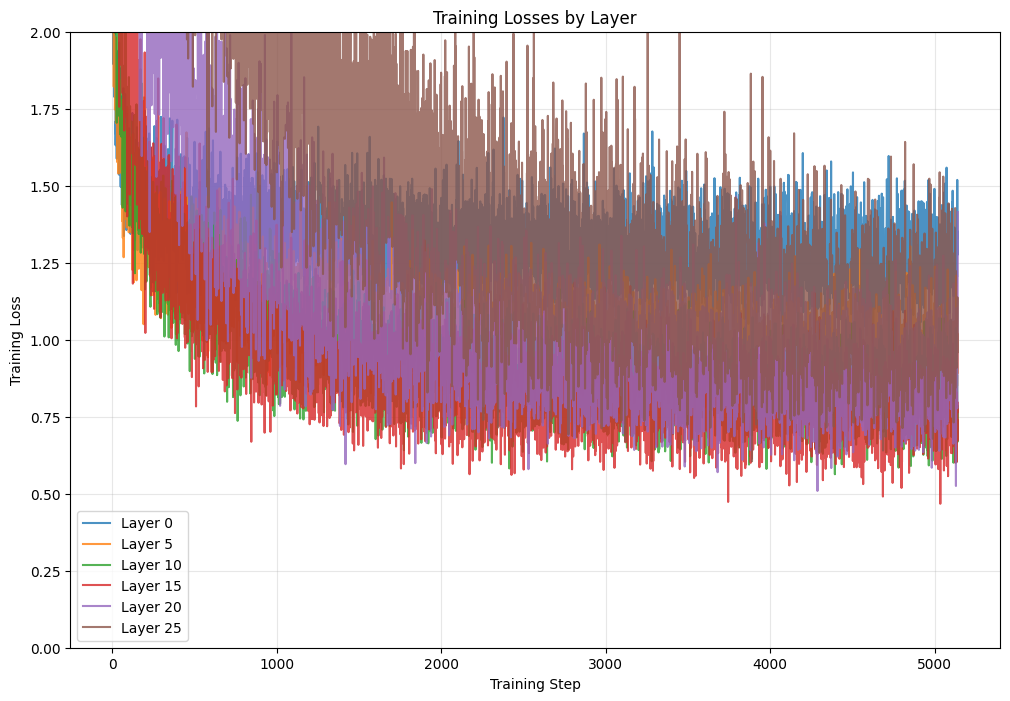

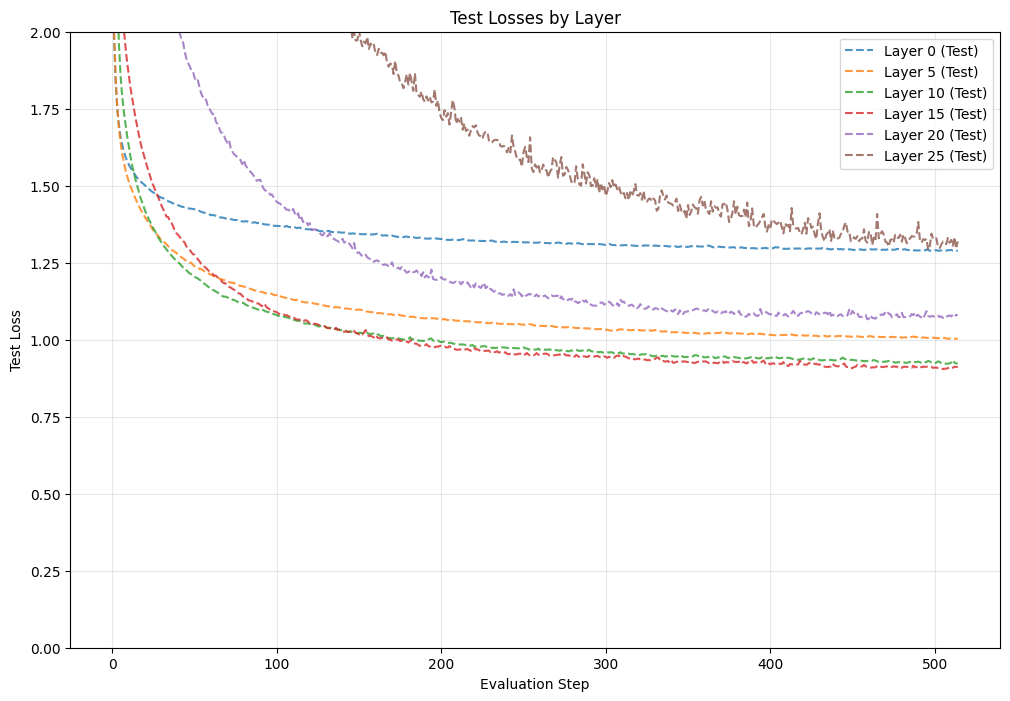

In [11]:
import matplotlib.pyplot as plt

# Plot the training losses for each layer
plt.figure(figsize=(12, 8))

for layer_idx, losses in losses_dict.items():
    plt.plot(losses, label=f'Layer {layer_idx}', alpha=0.8)

plt.xlabel('Training Step')
plt.ylabel('Training Loss')
plt.title('Training Losses by Layer')
plt.ylim(0, 2)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Also plot test losses if available
if test_losses_dict:
    plt.figure(figsize=(12, 8))
    
    for layer_idx, test_losses in test_losses_dict.items():
        if test_losses:  # Only plot if there are test losses
            plt.plot(test_losses, label=f'Layer {layer_idx} (Test)', alpha=0.8, linestyle='--')
    
    plt.xlabel('Evaluation Step')
    plt.ylabel('Test Loss')
    plt.title('Test Losses by Layer')
    plt.ylim(0, 2)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

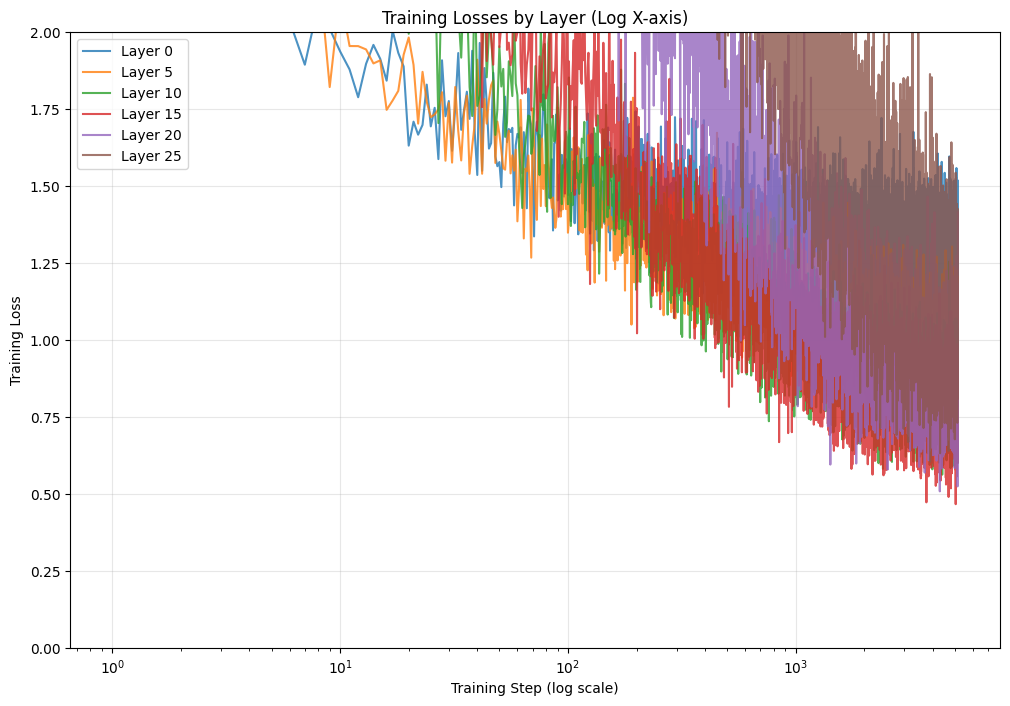

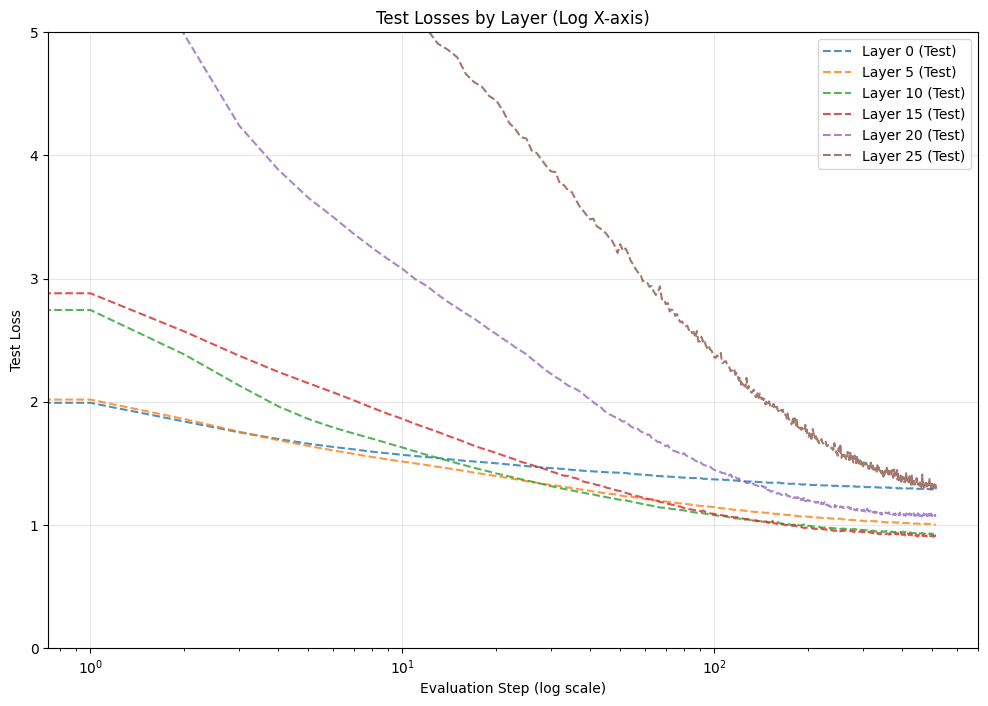

In [14]:
import matplotlib.pyplot as plt

# Plot the training losses for each layer with log x-axis
plt.figure(figsize=(12, 8))

for layer_idx, losses in losses_dict.items():
    plt.semilogx(losses, label=f'Layer {layer_idx}', alpha=0.8)

plt.xlabel('Training Step (log scale)')
plt.ylabel('Training Loss')
plt.title('Training Losses by Layer (Log X-axis)')
plt.ylim(0, 2)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Also plot test losses if available with log x-axis
if test_losses_dict:
    plt.figure(figsize=(12, 8))
    
    for layer_idx, test_losses in test_losses_dict.items():
        if test_losses:  # Only plot if there are test losses
            plt.semilogx(test_losses, label=f'Layer {layer_idx} (Test)', alpha=0.8, linestyle='--')
    
    plt.xlabel('Evaluation Step (log scale)')
    plt.ylabel('Test Loss')
    plt.title('Test Losses by Layer (Log X-axis)')
    plt.ylim(0, 5)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


More data probably doesnt help at this point

Take layer 15, and plot out the trajectories along the principle components. We are now testing the physics based approach

In [16]:
losses, test_losses, model = load_train_and_test_activations(15, return_model=True)

Loaded 0 activations
Loaded 10 activations
Loaded 20 activations
Loaded 30 activations
Loaded 40 activations
Loaded 50 activations
Loaded 60 activations
Loaded 70 activations
Loaded 80 activations
Loaded 90 activations
Loaded 100 activations
Loaded 110 activations
Loaded 120 activations
Loaded 130 activations
Loaded 140 activations
Loaded 150 activations
Loaded 160 activations
Loaded 170 activations
Loaded 180 activations
Loaded 190 activations
Loaded 200 activations
Loaded 210 activations
Loaded 220 activations
Loaded 230 activations
Loaded 240 activations
Loaded 250 activations
Loaded 260 activations
Loaded 270 activations
Loaded 280 activations
Loaded 290 activations
Loaded 300 activations
Loaded 310 activations
Loaded 320 activations
Loaded 330 activations
Loaded 340 activations
Loaded 350 activations
Loaded 360 activations
Loaded 370 activations
Loaded 380 activations
Loaded 390 activations
Loaded 400 activations
Loaded 410 activations
Loaded 420 activations
Loaded 430 activations

In [20]:
weight_tensor = model.linear.weight
torch.save(weight_tensor, 'weight_tensor.pt')
weight_tensor

Parameter containing:
tensor([[-2.7100e-03,  3.7413e-04, -3.4673e-03,  ...,  3.2946e-02,
         -1.3514e-02, -2.5053e-03],
        [-1.8720e-02,  1.1988e-02, -1.8643e-03,  ..., -1.4363e-02,
          5.9056e-05, -4.9393e-03],
        [-6.9403e-03, -5.5794e-04,  1.0705e-02,  ..., -6.8198e-03,
          6.0102e-06, -1.3852e-02],
        ...,
        [-9.1248e-04, -5.2323e-03, -8.9997e-03,  ...,  7.1169e-04,
          5.2210e-03, -4.0941e-03],
        [-2.1900e-02, -1.3036e-02,  4.3975e-03,  ...,  2.3962e-02,
          1.8390e-03, -8.1990e-03],
        [ 3.9474e-04, -1.5998e-02,  3.4141e-03,  ...,  4.3304e-03,
         -7.2554e-03, -3.2389e-02]], device='cuda:0', requires_grad=True)

Shape of weight tensor: torch.Size([8, 2304])
Shape after PCA: (8, 2)
Explained variance ratio: [0.36278358 0.17704667]
Total explained variance: 0.5398


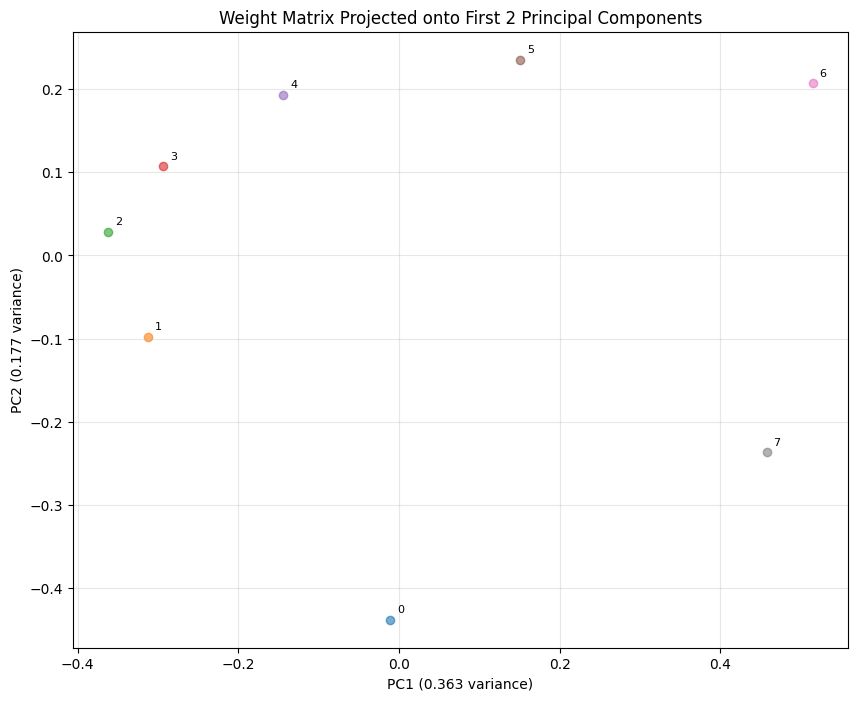

In [22]:
from sklearn.decomposition import PCA

# Get the weight tensor and convert to numpy for PCA
weight_numpy = weight_tensor.detach().cpu().numpy()

# Fit PCA to find the 2 principal components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(weight_numpy)

print(f"Shape of weight tensor: {weight_tensor.shape}")
print(f"Shape after PCA: {pca_result.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {pca.explained_variance_ratio_.sum():.4f}")

# Plot the principal components
plt.figure(figsize=(10, 8))
# Number each point with its index
for i in range(len(pca_result)):
    plt.scatter(pca_result[i, 0], pca_result[i, 1], alpha=0.6)
    plt.annotate(str(i), (pca_result[i, 0], pca_result[i, 1]), 
                xytext=(5, 5), textcoords='offset points', fontsize=8)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.3f} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.3f} variance)')
plt.title('Weight Matrix Projected onto First 2 Principal Components')
plt.grid(True, alpha=0.3)
plt.show()


In [23]:
activations_dir = '/workspace/llm-progress-monitor/rollouts/activations'
activations = []
layer_idx = 15
with torch.no_grad():
    for i in range(min(10,len(os.listdir(activations_dir)))): #TODO: remove min
        if i % 10 == 0:
            print(f"Loaded {i} activations")
            gc.collect()
            torch.cuda.empty_cache()
        filename = f'{i}.pt'
        if os.path.exists(os.path.join(activations_dir, filename)):
            activations.append(torch.load(os.path.join(activations_dir, filename))[layer_idx].to('cpu'))


Loaded 0 activations


In [26]:
activations[1].shape

torch.Size([510, 2304])

In [35]:
pca_tensor = torch.tensor(pca.components_)

In [38]:
pca_tensor.shape

torch.Size([2, 2304])

In [37]:
from einops import einsum

In [53]:
import pandas as pd

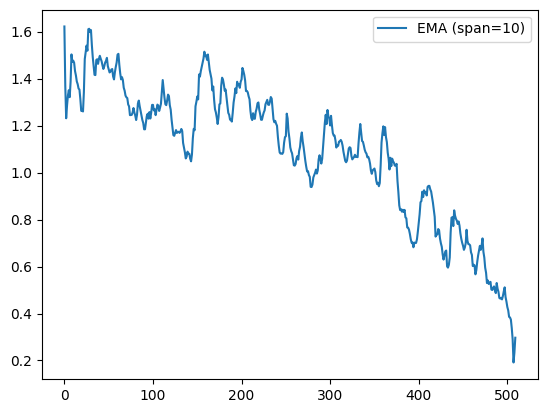

In [73]:
coords = einsum(activations[1], pca_tensor, 'seq d_model, pca d_model -> seq pca')


# Calculate EMA of the first principal component
ema_span = 10  # You can adjust this span value
ema_coords = pd.Series(coords[:,0].numpy()).ewm(span=ema_span).mean()

#plt.plot(coords[:,0], alpha=0.3, label='Original')
plt.plot(ema_coords/20+ 1, label=f'EMA (span={ema_span})')
plt.legend()


In [86]:
class ATanClassifier(nn.Module):
    def __init__(self,input_dim: int):
        super().__init__()
        self.start_linear = nn.Linear(input_dim, 2)
        self.end_linear = nn.Linear(1, 1)
    def forward(self, x):
        two_d = self.start_linear(x)
        post_atan = torch.atan2(two_d[...,0], two_d[...,1]).unsqueeze(-1)

        return self.end_linear(post_atan)

In [ ]:
layer_idx = 15
n_train = 10000
n_bins = 8
activations_dir = '/workspace/llm-progress-monitor/rollouts/activations'
activations = []

loss_fn = nn.MSELoss()

with torch.no_grad():
    for i in range(len(os.listdir(activations_dir))): #TODO: remove min
        if i % 10 == 0:
            print(f"Loaded {i} activations")
            gc.collect()
            torch.cuda.empty_cache()
        filename = f'{i}.pt'
        if os.path.exists(os.path.join(activations_dir, filename)):
            activations.append(torch.load(os.path.join(activations_dir, filename))[layer_idx].to('cpu'))
# Train-test split on activations


train_activations, test_activations = train_test_split(activations, test_size=0.2, random_state=42)
print(f"Train set size: {len(train_activations)}")
print(f"Test set size: {len(test_activations)}")



train_dataset = TokensRemainingDataset(train_activations)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TokensRemainingDataset(test_activations)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

    
model = ATanClassifier(train_dataset[0][0].shape[0]).to('cuda')
adam = optim.Adam(model.parameters(), lr=0.0001)
losses = []

test_losses = []

for i, (X, y, _) in enumerate(train_dataloader):
    model.zero_grad()
    preds = model(X.to('cuda'))
    y_log = y.log().to('cuda')
    loss = loss_fn(preds, y_log)
    loss.backward()
    adam.step()
    losses.append(loss.item())
    
    # Calculate test loss
    if i % 10 == 0:  # Calculate test loss every 10 batches
        model.eval()
        test_loss_sum = 0
        test_batches = 0
        with torch.no_grad():
            for X_test, y_test, _ in test_dataloader:
                preds_test = model(X_test.to('cuda'))
                y_test_transformed = bin_y(y_test, n_bins)
                test_loss = loss_fn(preds_test, y_test_transformed)
                test_loss_sum += test_loss.item()
                test_batches += 1
        test_losses.append(test_loss_sum / test_batches)
        model.train()
    
    print(f"Batch {i}, Train Loss: {loss.item():.4f}")
    if i % 10 == 0 and test_losses:
        print(f"Test Loss: {test_losses[-1]:.4f}")
    if i >= n_train:
        break

Loaded 0 activations
Loaded 10 activations
Loaded 20 activations
Loaded 30 activations
Loaded 40 activations
Loaded 50 activations
Loaded 60 activations
Loaded 70 activations
Loaded 80 activations
Loaded 90 activations
Loaded 100 activations
Loaded 110 activations
Loaded 120 activations
Loaded 130 activations
Loaded 140 activations
Loaded 150 activations
Loaded 160 activations
Loaded 170 activations
Loaded 180 activations
Loaded 190 activations
Loaded 200 activations
Loaded 210 activations
Loaded 220 activations
Loaded 230 activations
Loaded 240 activations
Loaded 250 activations
Loaded 260 activations
Loaded 270 activations
Loaded 280 activations
Loaded 290 activations
Loaded 300 activations
Loaded 310 activations
Loaded 320 activations
Loaded 330 activations
Loaded 340 activations
Loaded 350 activations
Loaded 360 activations
Loaded 370 activations
Loaded 380 activations
Loaded 390 activations
Loaded 400 activations
Loaded 410 activations
Loaded 420 activations
Loaded 430 activations

In [ ]:
plt.plot(test_losses)